## IMPORT LIB TO FETCH AND EXECUTE THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv(r'D:\CLG\KEGGLE DATA\DATA\train.csv')
df_test= pd.read_csv(r'D:\CLG\KEGGLE DATA\DATA\test.csv')

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## By default show top 5 data with its head
df_train.head()

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Count TOTAL NUMBER OF RAWS AND COLUMNS
df_train.shape

In [5]:
df_train.shape

(8523, 12)

## INFORMATION OF RAW AND COLUMNS, NON-NULL COUNT AND DATA-TYPE
df_train.info()

In [124]:
##df_train.info()

## CHECK NULL VALUE AND TEHIR SUM COUNTS
df_train.isnull().sum()

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## FILL THE VALUE OF #MEAN IN EXCEL SHEET & remove ITEM WEIGHT NULL value

In [10]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [11]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
 df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

## Check which one one of the data is #Hight_in_counts and lower_in_counts

In [14]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

## For catogarical columns use #MODE data-type #OBJECT

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

## CHECK PERTICULAR COLUMN NULL DATA >>> df_train['OUTLET_SIZE'].isnull()
df_test.isnull().sum()

## For item weight GRAPH

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 200x200 with 0 Axes>

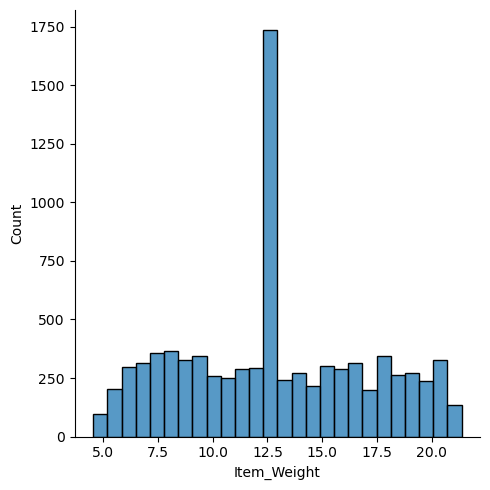

In [16]:
plt.figure(figsize=(2,2))
sns.displot(df_train['Item_Weight'])
plt.show()

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 200x200 with 0 Axes>

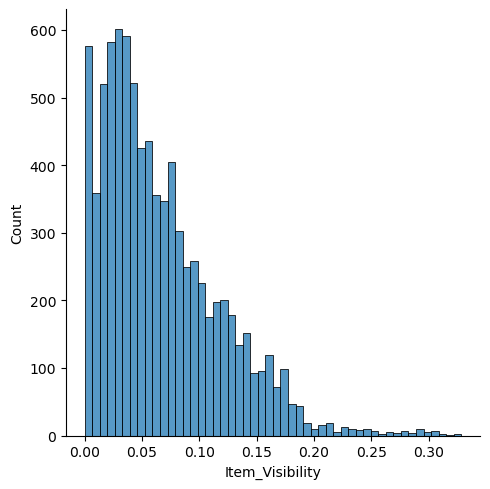

In [81]:
plt.figure(figsize=(2,2))
sns.displot(df_train['Item_Visibility'])
plt.show()

## DROP>> DELETE A WAISTED COLUMN (axis=1) USING drop

In [17]:
#df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
#df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

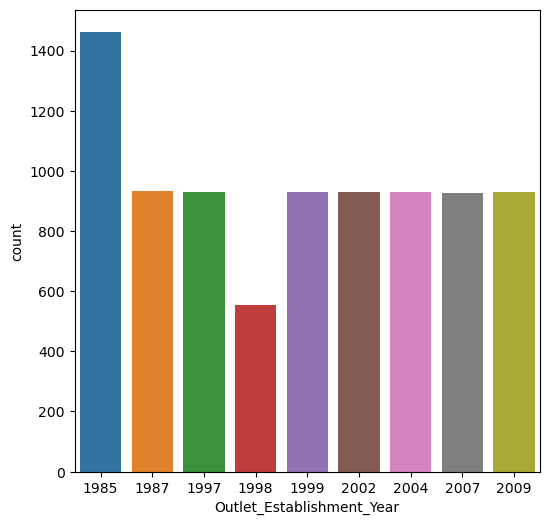

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

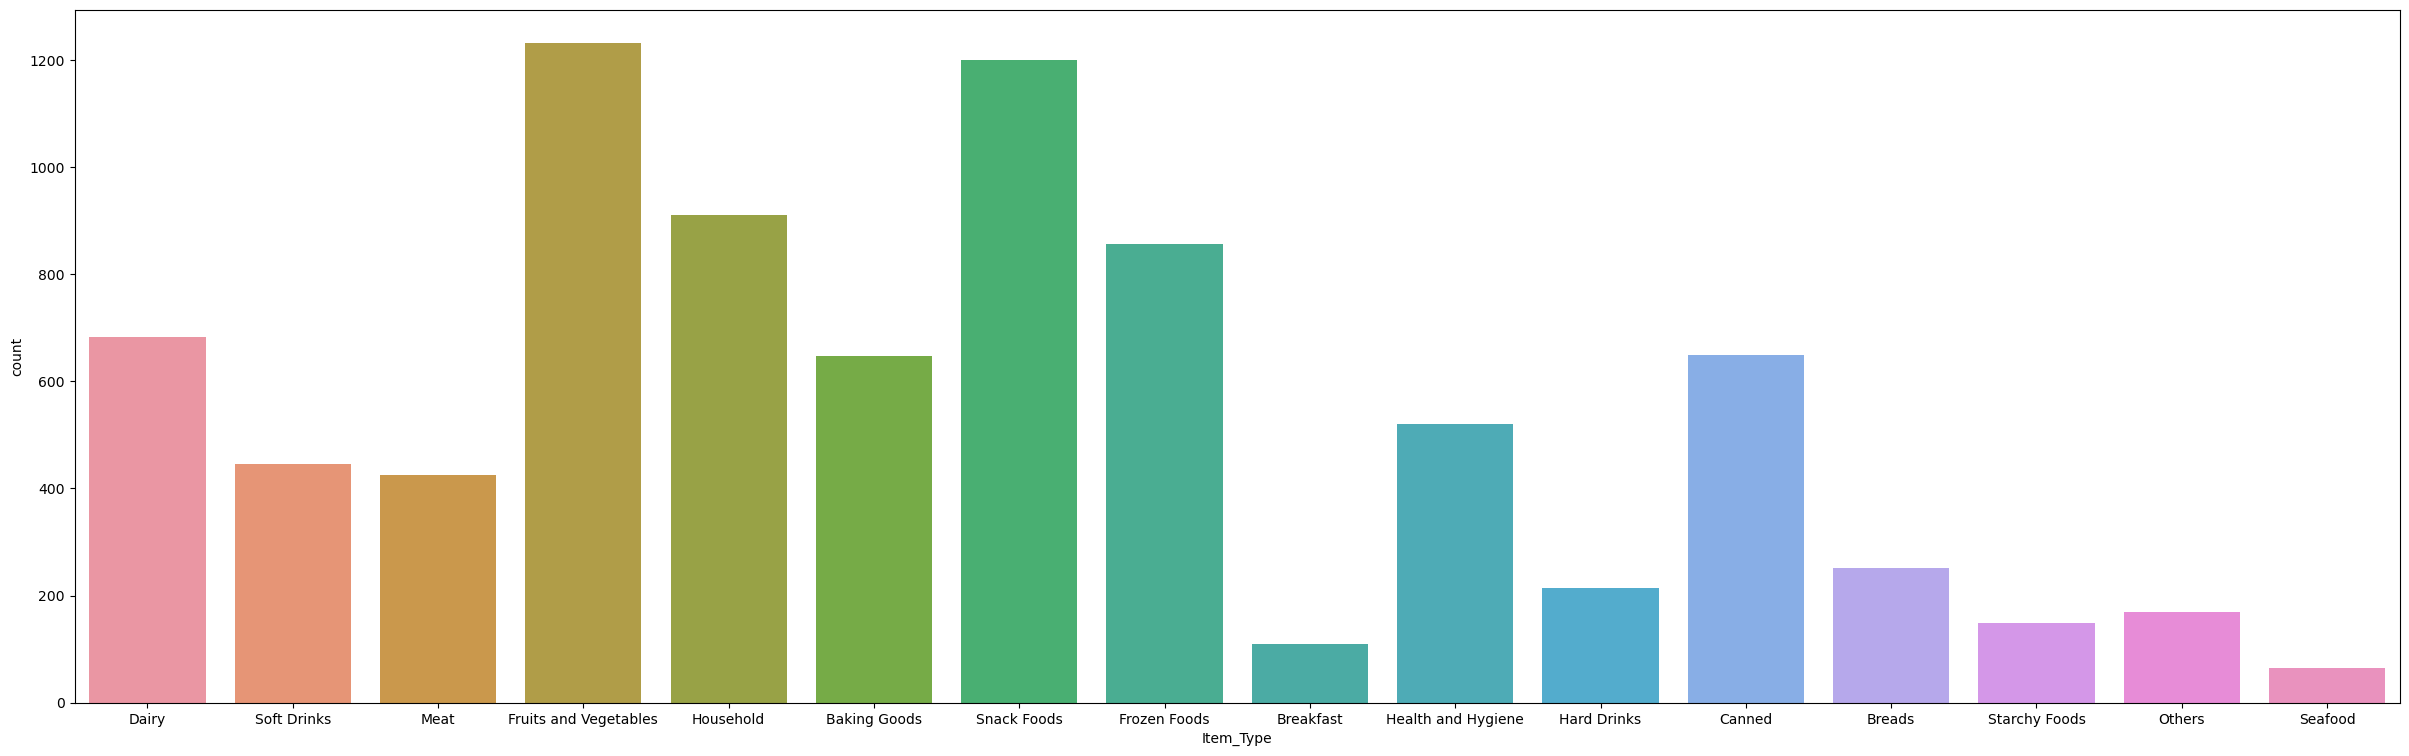

In [19]:
plt.figure(figsize=(30,9))
sns.countplot(x='Item_Type', data=df_train)
plt.show()

## import Dtale & Klib libraries for function and visualisation datasets

In [21]:
!pip install dtale

In [23]:
import dtale as dt

In [24]:
dt.show(df_train)

In [83]:
df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Location_Type'],axis=1,inplace=True)

In [37]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Supermarket Type2,1845.5976


## EDA AUTOMATE using PANDA PROFILING INSTALL

In [25]:
!pip install pandas-profiling

  Using cached joblib-1.0.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached MarkupSafe-2.0.1-py3-none-any.whl
Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.11.0 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [26]:
!pip install --upgrade pandas_profiling

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl.metadata (4.8 kB)
Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl (262 kB)
Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl (17 kB)
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.1.0
    Uninstalling tangled-up-in-unicode-0.1.0:
      Successfully uninstalled tangled-up-in-unicode-0.1.0
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: joblib
    Found existing installation: joblib

In [2]:
!pip install --upgrade numba

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB 330.3 kB/s eta 0:00:08
    --------------------------------------- 0.1/2.6 MB 525.1 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.6 MB 901.1 kB/s eta 0:00:03
   ------------- -------------------------- 0.9/2.6 MB 5.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: numba
    Found existing installation: numba 0.59.0
    Uninstalling numba-0.59.0:
      Successfully uninstalled numba-0.59.0


In [7]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install --upgrade pandas-profiling

In [10]:
!pip install --upgrade numba

In [12]:
import numba
print(numba.__version__)

0.59.1


D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


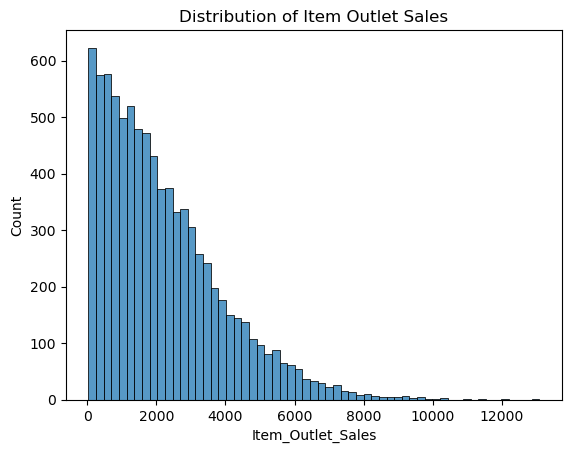

In [29]:
sns.histplot(df_train['Item_Outlet_Sales'])
plt.title('Distribution of Item Outlet Sales')
plt.show()

In [30]:
print(df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP']].dtypes)

Item_Weight        float64
Item_Visibility    float64
Item_MRP           float64
dtype: object


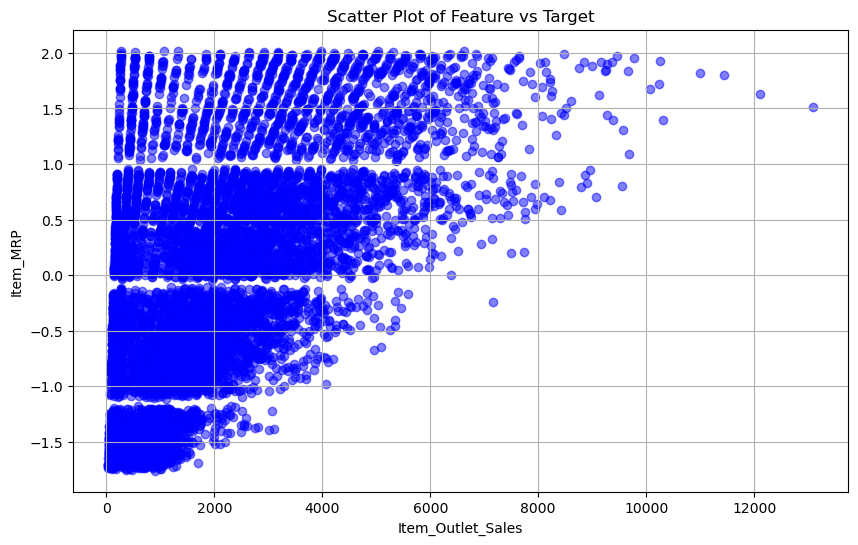

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Item_Outlet_Sales'], df_train['Item_MRP'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Feature vs Target')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_MRP')
plt.grid(True)
plt.show()

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Item_Outlet_Sales'], df_train['Item_MRP'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Feature vs Target')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_MRP')
plt.grid(True)
plt.show()

Item_Weight        0
Item_Visibility    0
Item_MRP           0
dtype: int64


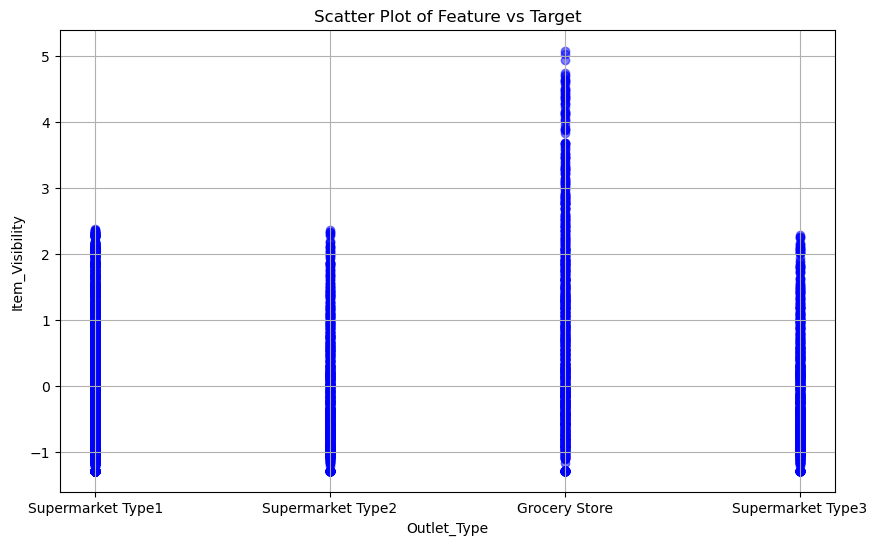

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Outlet_Type'], df_train['Item_Visibility'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Feature vs Target')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Visibility')
plt.grid(True)
plt.show()

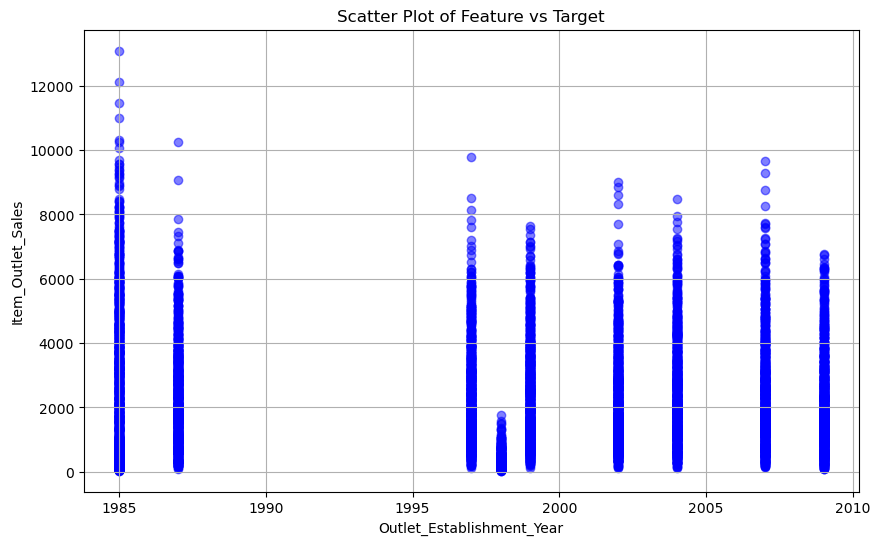

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Outlet_Establishment_Year'], df_train['Item_Outlet_Sales'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Feature vs Target')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.grid(True)
plt.show() #Outlet_Establishment_Year,Item_Outlet_Sales

## Replace "LF, lf low fat" with "Low Fat" in the 'Item_Fat_Content' column


In [104]:
# Replace "LF" with "Low Fat" in the 'Fat_Content' column
df_train['Item_Fat_Content'].replace({'low fat': 'lf', 'reg': 'regular'}, inplace=True)

df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['low fat', 'LF','lf'], 'Low Fat')

In [102]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['regular'], 'Regular')

## CHECK WHICH FAT MORE SOLD COUNTS

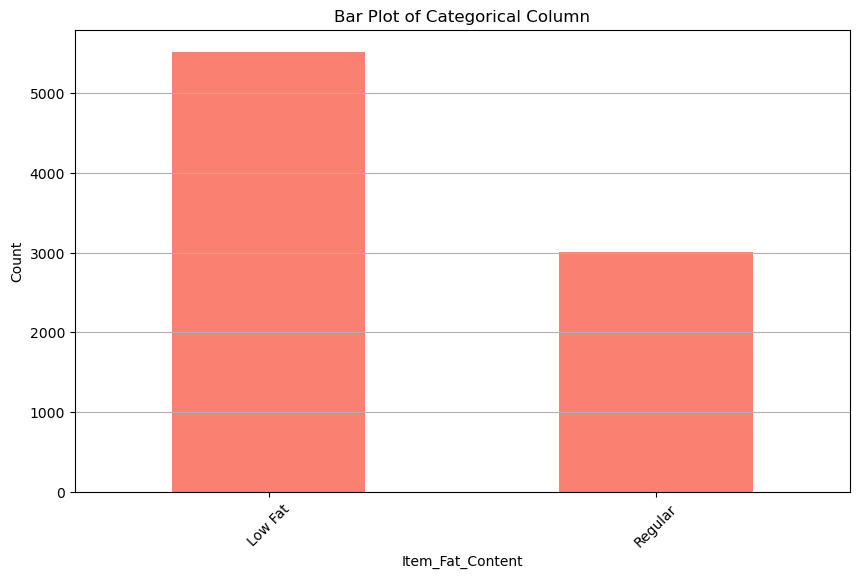

2024-04-19 00:42:06,973 - INFO     - Executing shutdown due to inactivity...
2024-04-19 00:42:15,277 - INFO     - Executing shutdown...
2024-04-19 00:42:15,293 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [105]:
plt.figure(figsize=(10, 6))
df_train['Item_Fat_Content'].value_counts().plot(kind='bar', color='salmon')
plt.title('Bar Plot of Categorical Column')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## 	EDA USING KLIB LIBRARY <---> Import klinb After Installing

In [50]:
!pip install klib

In [52]:
import klib

GridSpec(6, 4)

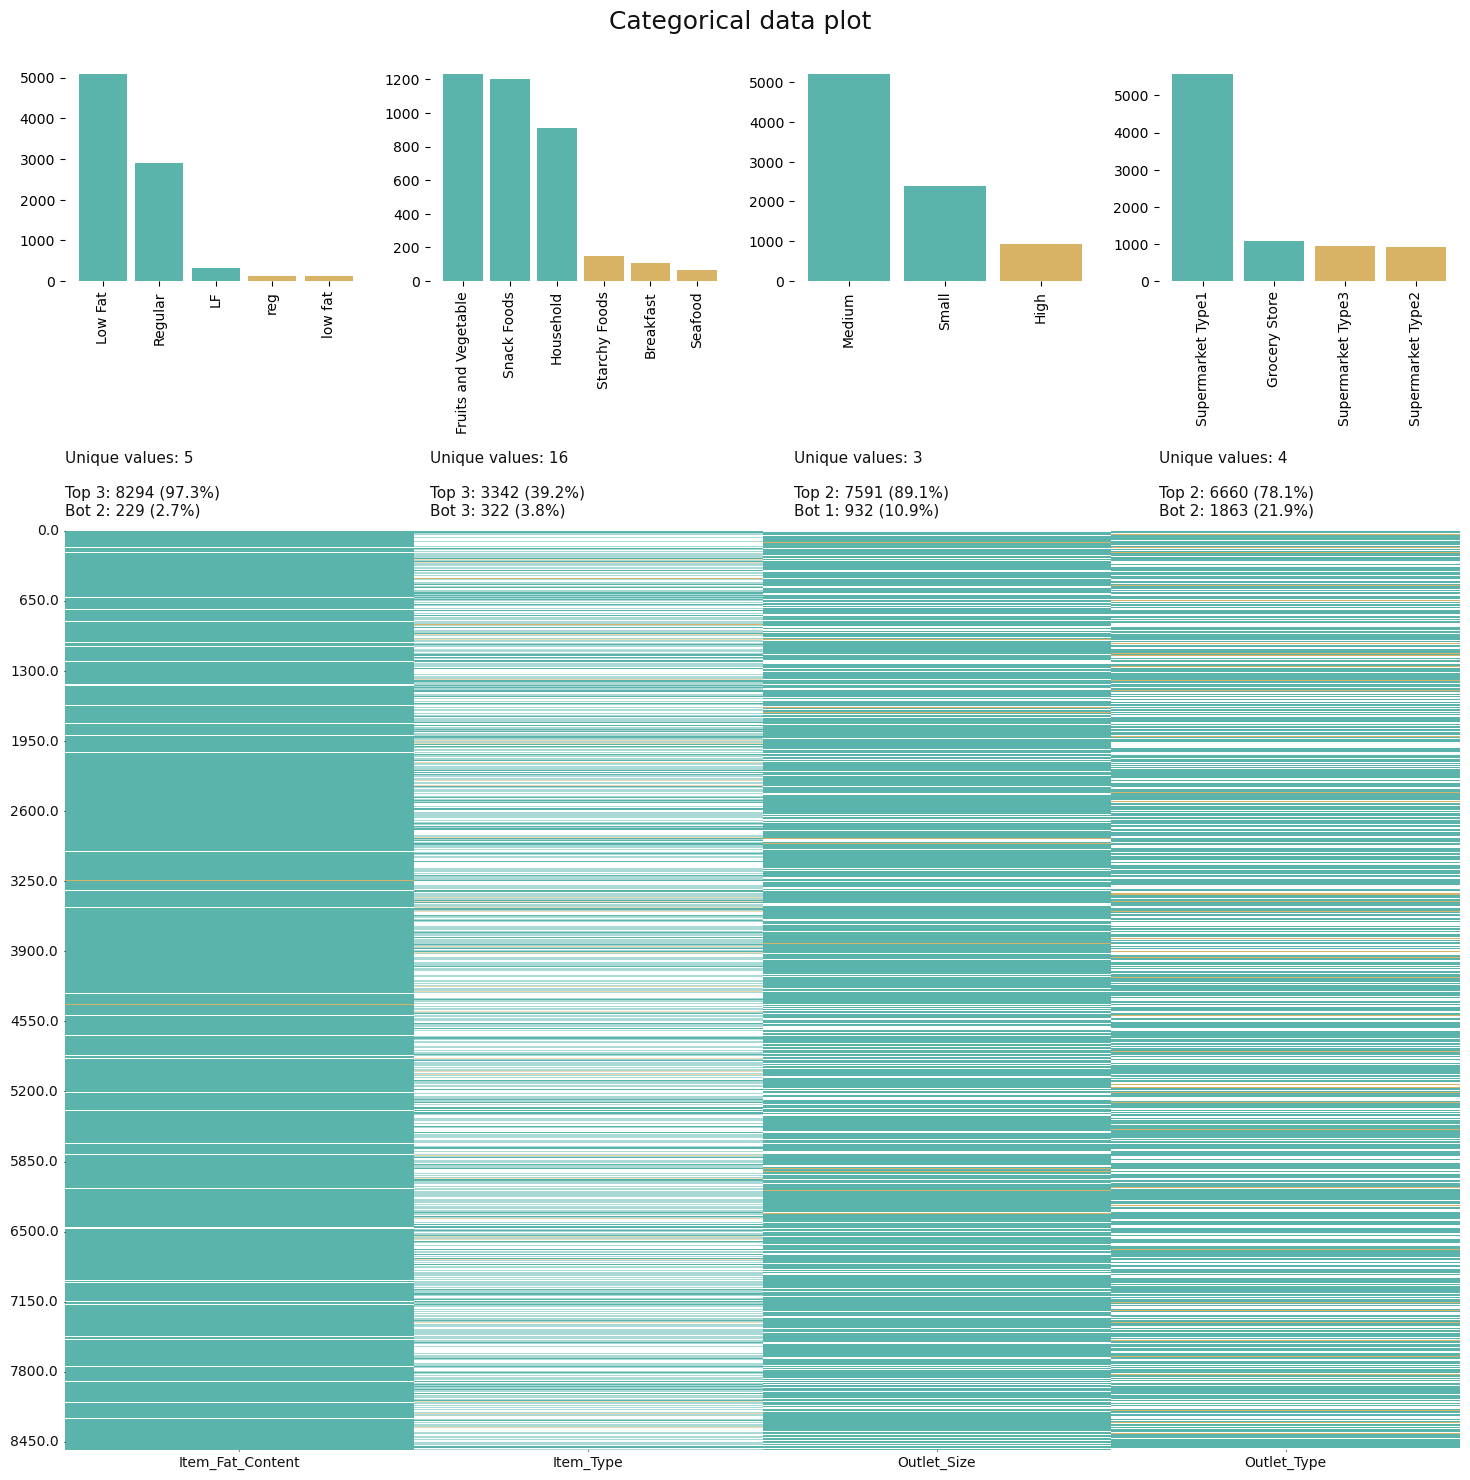

In [64]:
klib.cat_plot(df_train)

D:\ANACONDA\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: title={'center': 'Feature-correlation (pearson)'}>

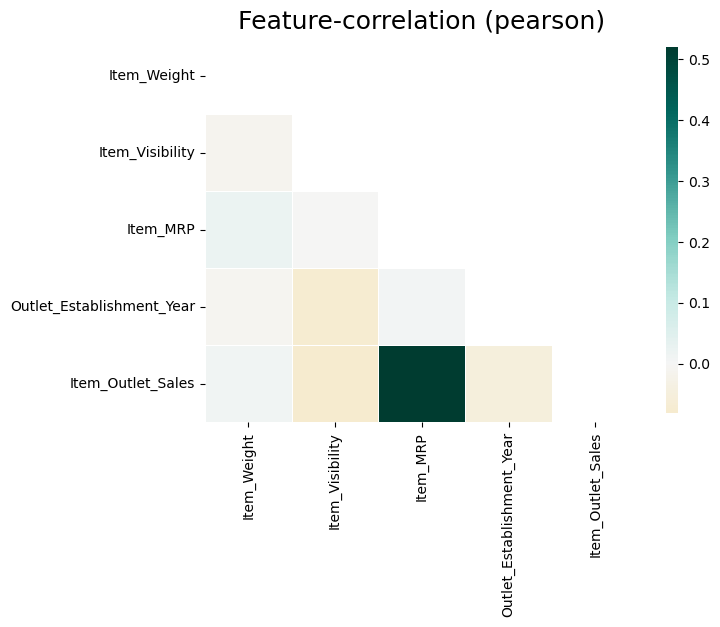

In [62]:
klib.corr_plot(df_train, figsize = (7, 5))

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Item_Weight', ylabel='Density'>

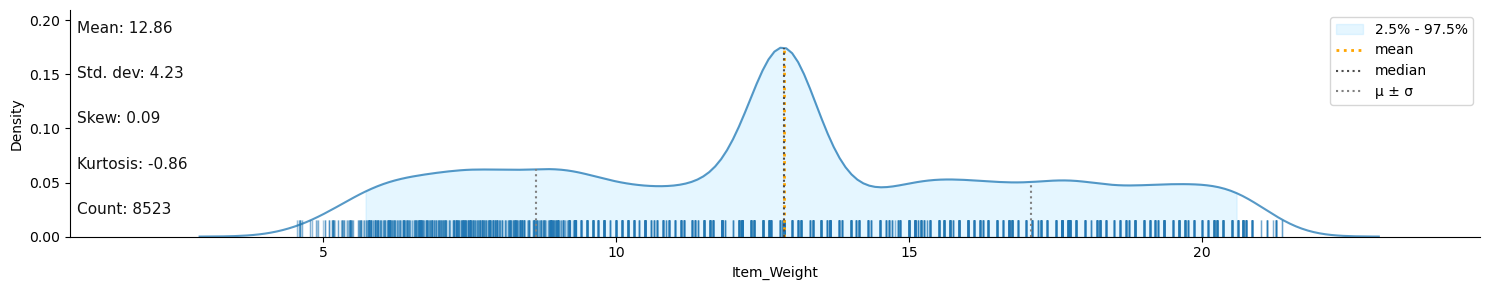

In [65]:
klib.dist_plot(df_train)

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Item_Visibility', ylabel='Density'>

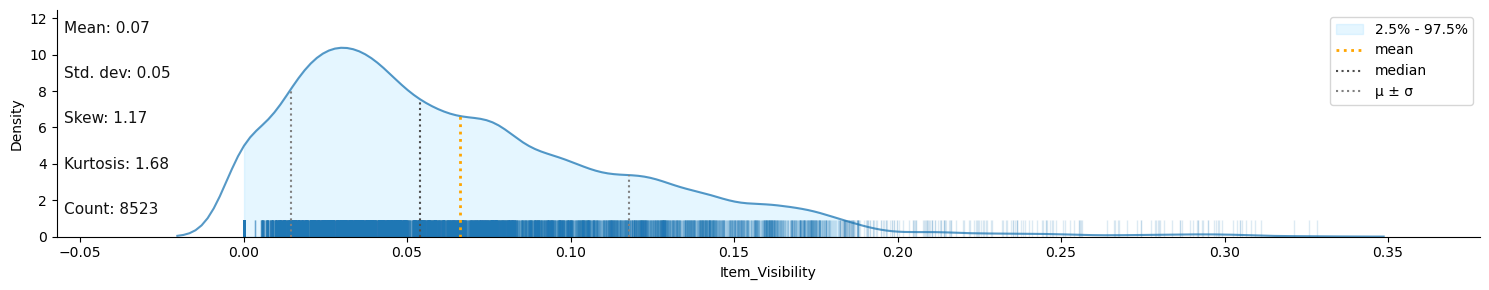

In [66]:
klib.dist_plot(df_train.Item_Visibility)

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Item_MRP', ylabel='Density'>

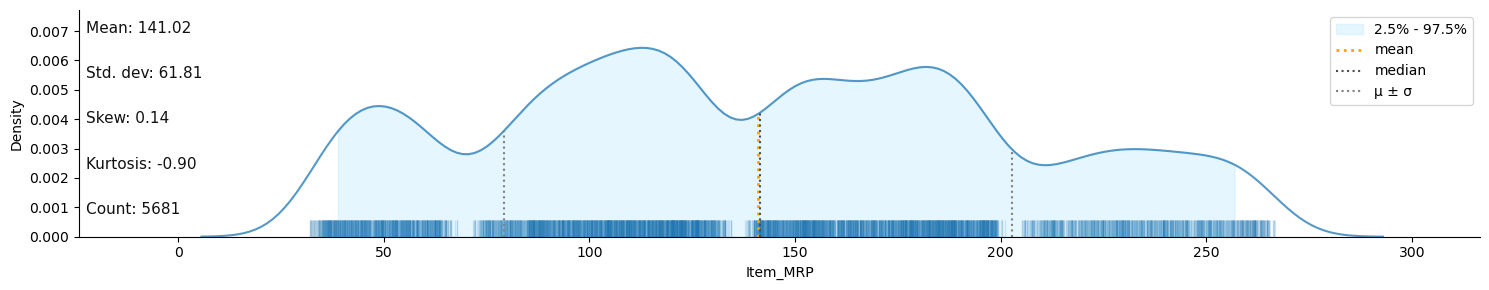

In [67]:
klib.dist_plot(df_test.Item_MRP)

## EDA WITH SEABORN LIBRARY--Installin/Import SEASBORN Library

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


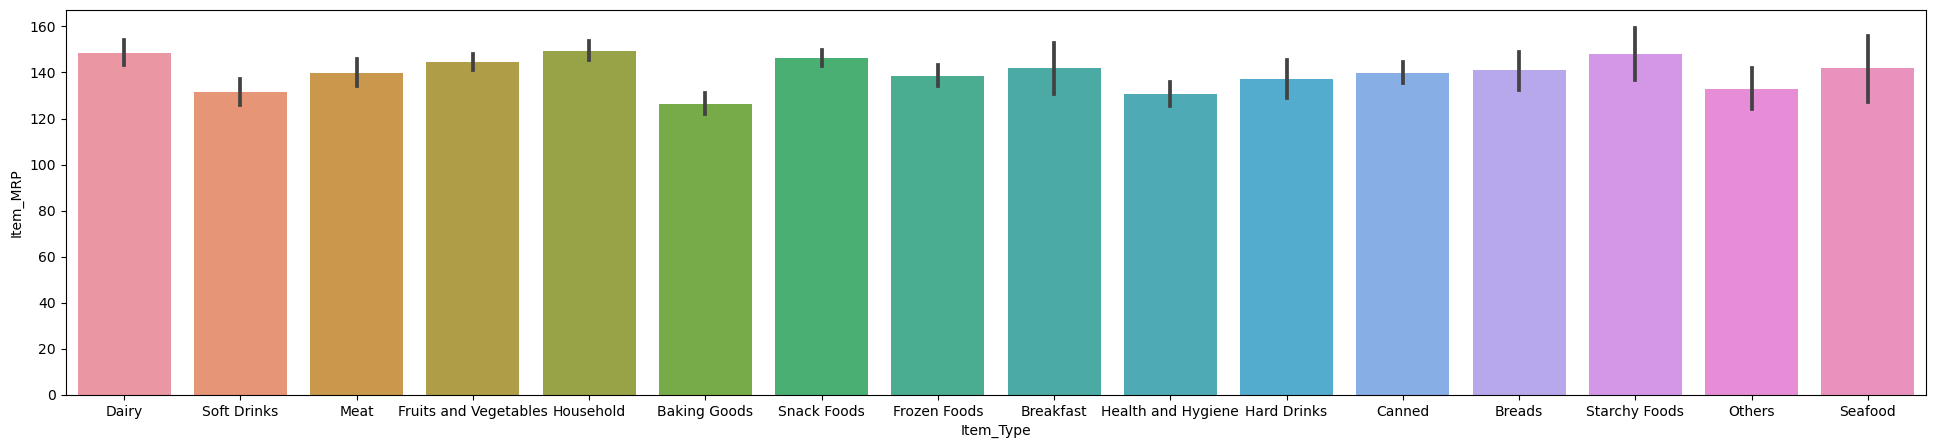

In [104]:
#barplot
# Specify x and y parameters explicitly
plt.figure(figsize=(24,5))
res = sns.barplot(x=df_train['Item_Type'], y=df_train['Item_MRP'],)
plt.show()

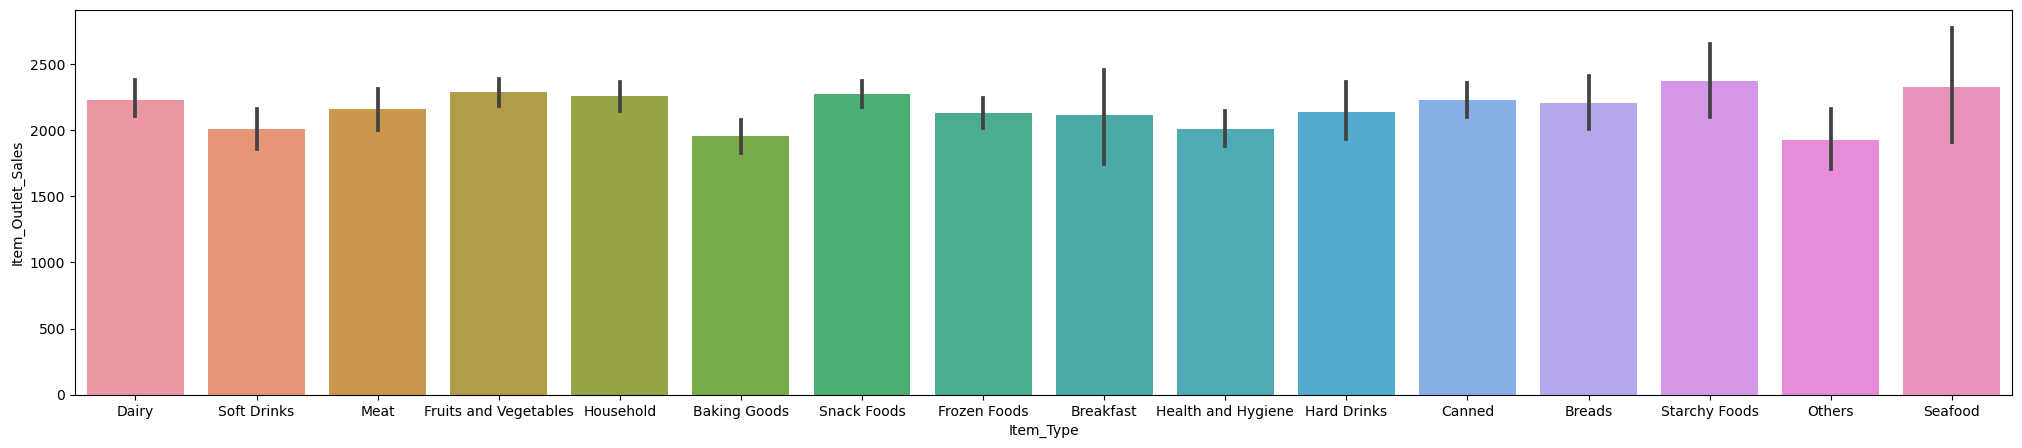

In [108]:
#barplot
# Specify x and y parameters explicitly
plt.figure(figsize=(25,5))
res = sns.barplot(x=df_train['Item_Type'], y=df_train['Item_Outlet_Sales'],)
plt.show()

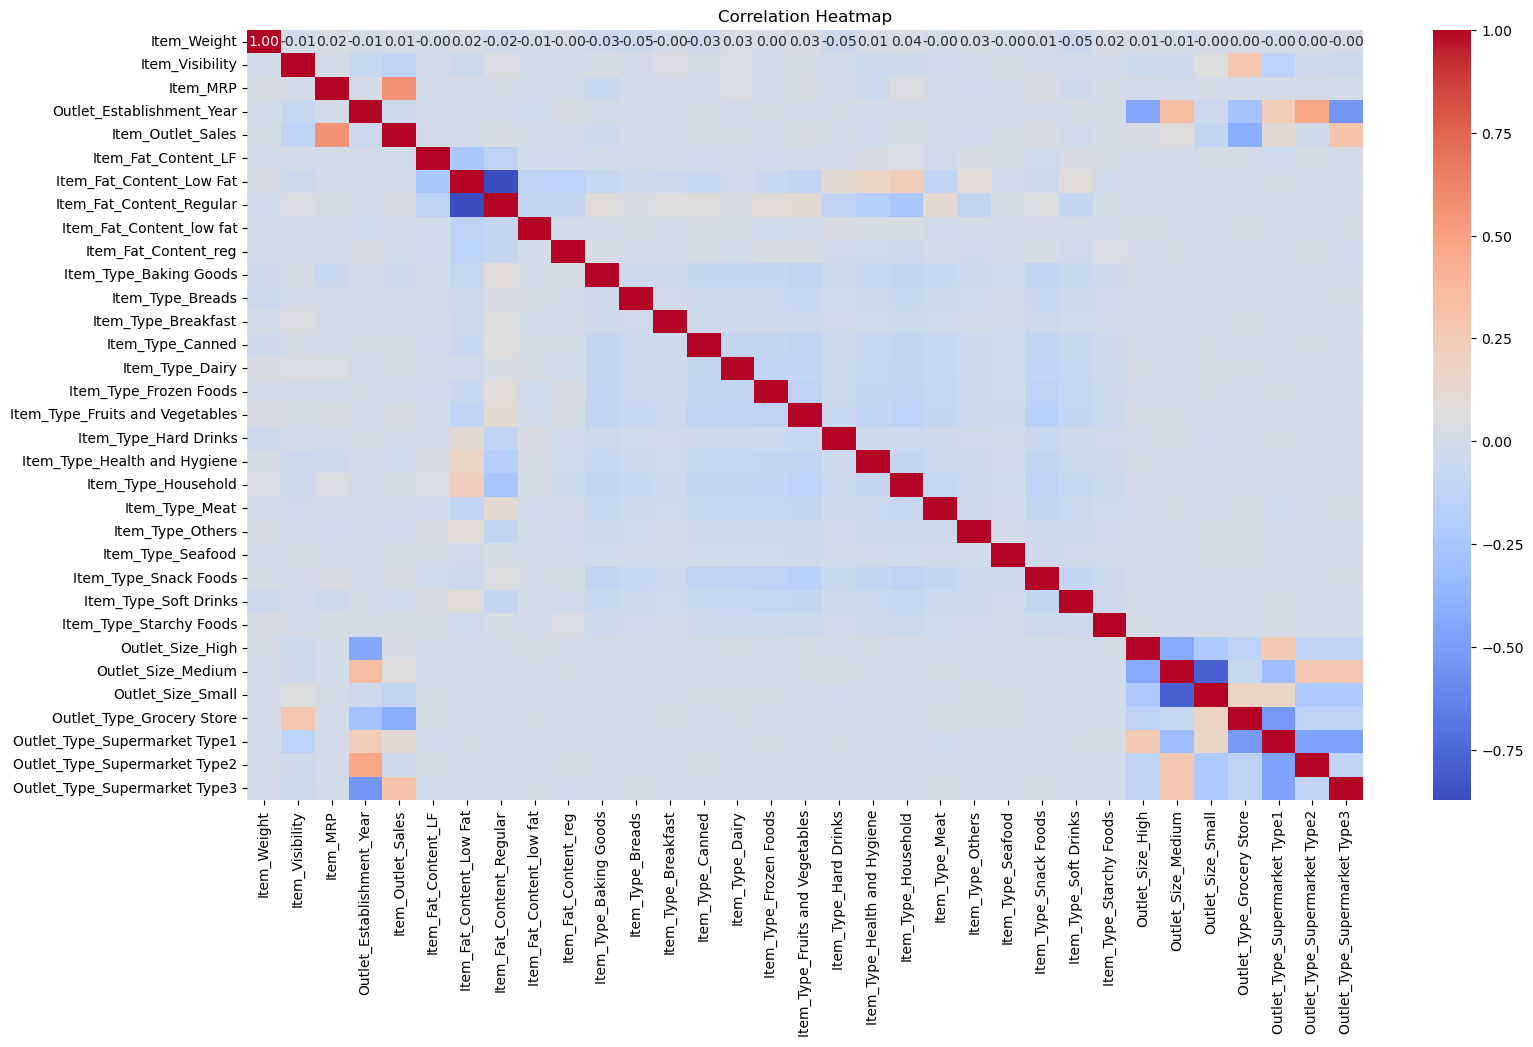

In [112]:
df_encoded = pd.get_dummies(df_train, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type'])

# Plot heatmap of correlations
plt.figure(figsize=(18, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

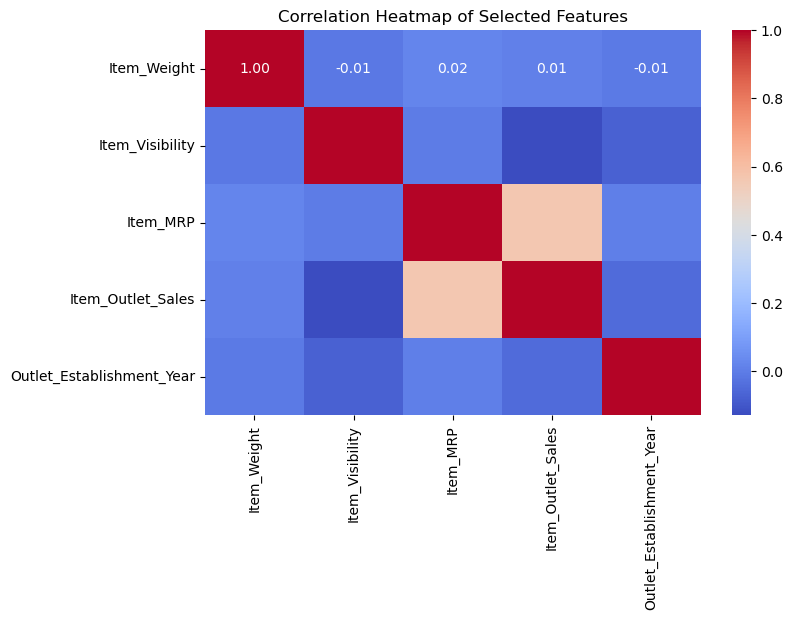

In [115]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Subset the dataframe with the specified columns
subset_df = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']]

# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


## DATA CLEANING

In [116]:
klib.data_cleaning(df_train)

Shape of cleaned data: (8523, 9) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.41 MB (-69.49%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Supermarket Type2,1845.597656


In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB
